In [1]:
import os
import sys
import cv2
import configparser
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import application.extractor.extract as extractor
from IPython.display import display
import application.detector.detect as detector
import application.enhancer.enhance as enhancer
import application.enhancer.mtcn_face as mtcn_face
import ipywidgets as widgets
from ipywidgets import Button, HBox, Checkbox, GridspecLayout, Layout
from IPython.display import clear_output
from mtcnn.mtcnn import MTCNN


Using TensorFlow backend.


Text(value='./application/input/A1/03.tif', description='Path:', placeholder='Type something')

Button(button_style='info', description='Extract Faces', style=ButtonStyle())

Checkbox(value=True, description='MTCN Detection')

Checkbox(value=True, description='Enhanced Detection')

Label(value='(14) Faces have been detected')

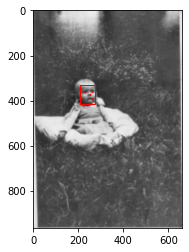

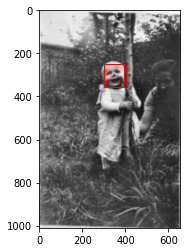

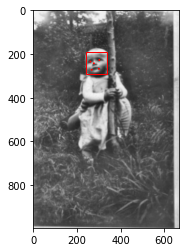

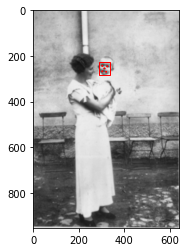

In [3]:
path = './application/input/A1/01.tif'
image_folder_box = widgets.Text(
    value=r'./application/input/A1/01.tif',
    placeholder='Type something',
    description='Path:',
    disabled=False
)
information_label = widgets.Label(value="Select detection type and click Extact faces")
mtcnBox = Checkbox(False, description='MTCN Detection')
enhancedBox = Checkbox(False, description='Enhanced Detection')
button_extract_faces = Button(description="Extract Faces", button_style= 'info')

def displayButtons():
    display(image_folder_box)
    display(button_extract_faces)
    display(mtcnBox)
    display(enhancedBox)
    display(information_label)
    
displayButtons()

def extract_faces(b):
    clear_output(wait=True)
    displayButtons()
    from matplotlib import pyplot
    img = cv2.imread(image_folder_box.value, cv2.IMREAD_COLOR)
    information_label.value = "Face Extraction is in progress. Please wait."
    if img is None:
        sys.exit("Error no image found!")

    full_name = os.path.basename(path)
    name = os.path.splitext(full_name)[0]
    config = []
    cropped_images = extractor.get_background_extracted_images(img, config)
    enhance = enhancedBox.value
    mtcnn_face = mtcnBox.value
    standard_list = []
    mtcn_list = []
    length = 0
    
    for i, image in enumerate(cropped_images):
        img = extractor.get_frame_extracted_image(image, config)
        if enhance:
            img = enhancer.enhance_image(img)
        if mtcnn_face:
            mtcnnDetector = MTCNN()
            # detect faces in the image
            faces = mtcnnDetector.detect_faces(img)
            
            length += len(faces)
            # display faces on the original image
            pyplot = mtcn_face.draw_image_with_boxes(img, faces, name + '_' + str(i))
            pyplot.show()
        else:
            path_frontal_classifier = './application/detector/cascade/haarcascade_frontalface.xml'
            path_profile_classifier = './application/detector/cascade/haarcascade_profileface.xml'
            frontal_classifier = cv2.CascadeClassifier(path_frontal_classifier)
            profile_classifier = cv2.CascadeClassifier(path_profile_classifier)
            faces_count = detector.get_detected_faces(img, frontal_classifier, profile_classifier, config, '/output', name + '_' + str(i))
            length += faces_count

            #standard_list.append(faces)
            
            pyplot.imshow(img)
            pyplot.title(name)
            pyplot.show()
            
    
    pyplot.show()
    information_label.value = "(" + str(length) + ") Faces have been detected"
button_extract_faces.on_click(extract_faces)

    